In [1]:
import sys
import os


path_to_src = os.path.abspath(os.path.join("c:\\Users\\user\\OneDrive\\Desktop\\see\\tenx", 'week2', 'src'))


sys.path.append(path_to_src)





In [3]:


try:
    from load_data import load_data_from_postgres
    print("Modules imported successfully")
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")




Modules imported successfully


In [4]:

query = "SELECT * FROM xdr_data;"  


df = load_data_from_postgres(query)


if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


<connection object at 0x0000027A55FD0E10; dsn: 'user=postgres password=xxx dbname=Tenax host=localhost port=5432', closed: 0>


c:\Users\user\OneDrive\Desktop\see\tenx\week2\src\load_data.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [4]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
sessions_frequency = df.groupby('MSISDN/Number').size()

sessions_frequency

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Length: 106856, dtype: int64

In [6]:
top_20_users = sessions_frequency.nlargest(20)
top_20_users

MSISDN/Number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.360313e+10    12
3.360452e+10    12
3.362708e+10    12
3.376041e+10    12
3.378632e+10    12
3.365936e+10    11
3.366471e+10    11
3.366646e+10    11
3.366907e+10    11
3.369879e+10    11
3.362695e+10    10
3.363004e+10    10
3.365826e+10    10
dtype: int64

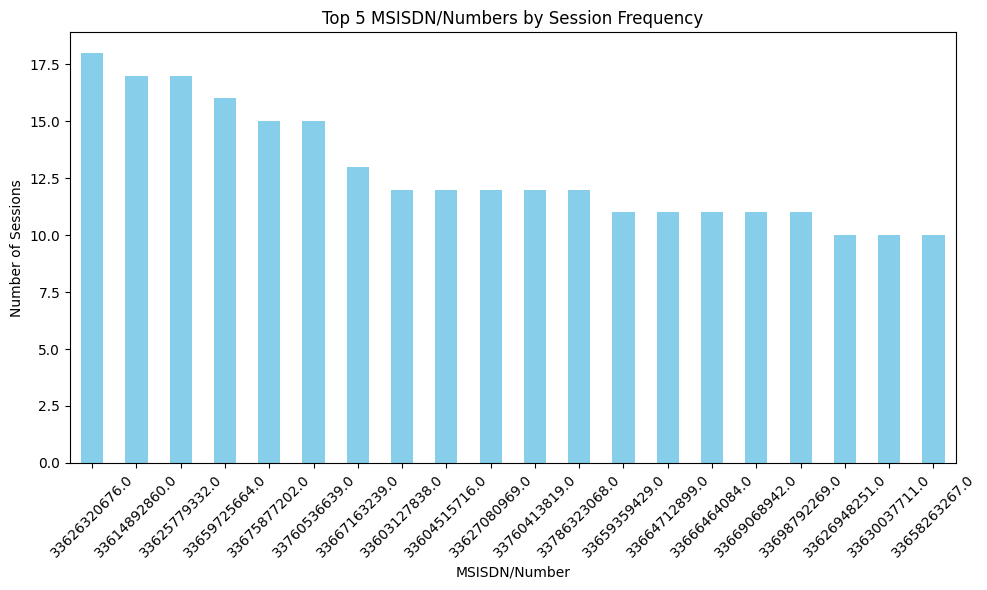

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_20_sessions=sessions_frequency.nlargest(20)
top_20_sessions.plot(kind='bar', color='skyblue')
plt.title('Top 5 MSISDN/Numbers by Session Frequency')
plt.xlabel('MSISDN/Number')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [5]:
average_session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].mean()
total_session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()


In [25]:
total_session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_11756\3203482712.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_session_duration.nlargest(10, 'Total Duration (ms)'),


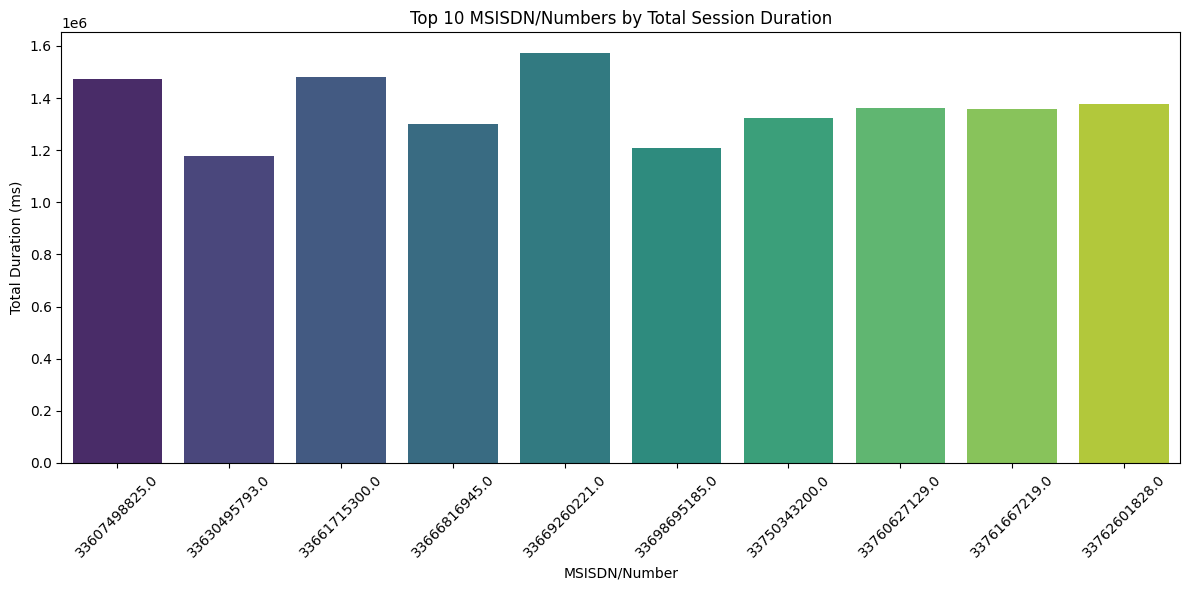

In [23]:
import seaborn as sns
total_session_duration = average_session_duration.reset_index()
total_session_duration.columns = ['MSISDN/Number', 'Total Duration (ms)']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=total_session_duration.nlargest(10, 'Total Duration (ms)'), 
            x='MSISDN/Number', y='Total Duration (ms)', palette='viridis')
plt.title('Top 10 MSISDN/Numbers by Total Session Duration')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Duration (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [10]:
average_session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     18552.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_12688\3893833695.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_session_duration_df.nlargest(10, 'Average Duration (ms)'),


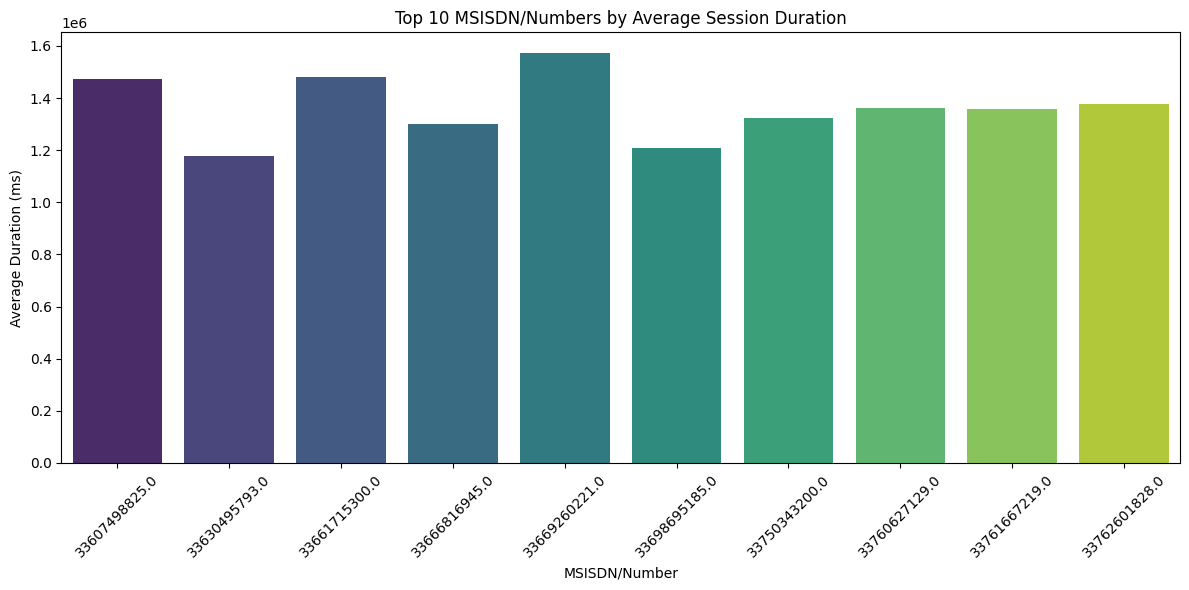

In [28]:
import seaborn as sns

average_session_duration_df = average_session_duration.reset_index()
average_session_duration_df.columns = ['MSISDN/Number', 'Average Duration (ms)']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=average_session_duration_df.nlargest(10, 'Average Duration (ms)'), 
            x='MSISDN/Number', y='Average Duration (ms)', palette='viridis')
plt.title('Top 10 MSISDN/Numbers by Average Session Duration')
plt.xlabel('MSISDN/Number')
plt.ylabel('Average Duration (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [6]:
df['total_traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_traffic = df.groupby('MSISDN/Number')['total_traffic'].sum()
total_traffic

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: total_traffic, Length: 106856, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_11756\52443705.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_traffic_df, x='MSISDN/Number', y='Total Traffic (Bytes)', palette='cividis')


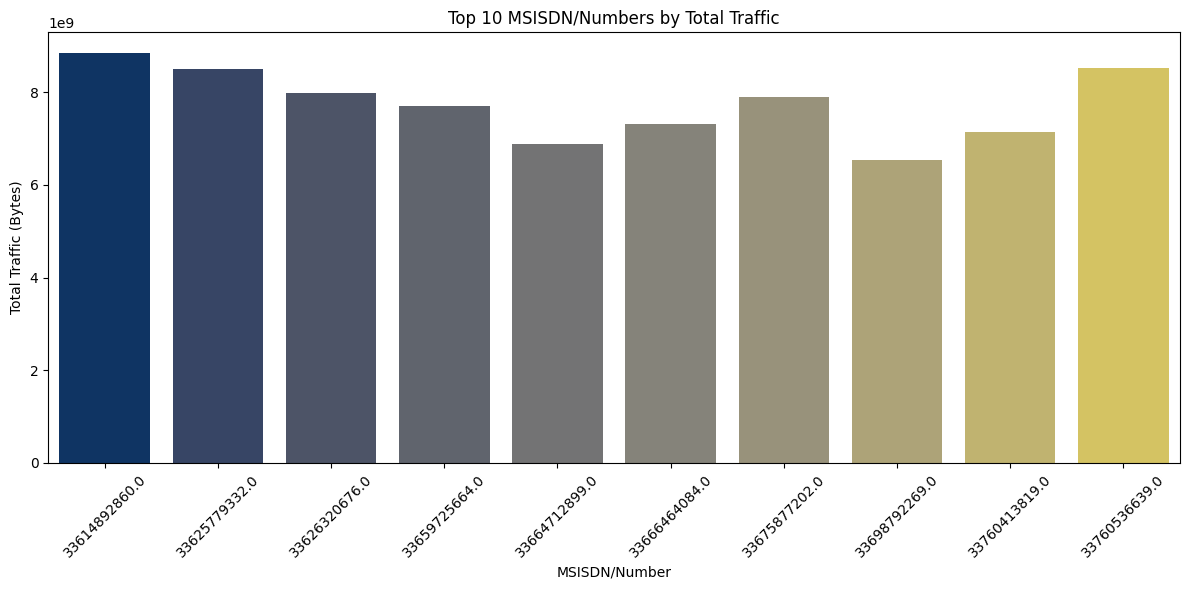

In [15]:
import pandas as pd
if isinstance(total_traffic, pd.Series):
    total_traffic_df = total_traffic.reset_index()
    total_traffic_df.columns = ['MSISDN/Number', 'Total Traffic (Bytes)']
else:
    raise ValueError("total_traffic is not a Pandas Series.")
top_traffic_df = total_traffic_df.nlargest(10, 'Total Traffic (Bytes)')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_traffic_df, x='MSISDN/Number', y='Total Traffic (Bytes)', palette='cividis')
plt.title('Top 10 MSISDN/Numbers by Total Traffic')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [10]:
import pandas as pd
engagement_metrics = pd.DataFrame({
    'sessions_frequency': sessions_frequency,
    'average_session_duration': average_session_duration,
    'total_session_duration': total_session_duration,
    'total_traffic': total_traffic
})

engagement_metrics.fillna(0, inplace=True)
engagement_metrics

,sessions_frequency,average_session_duration,total_session_duration,total_traffic
MSISDN/Number,,,,
3.360100e+10,1,116720.0,116720.0,8.786906e+08
3.360100e+10,1,181230.0,181230.0,1.568596e+08
3.360100e+10,1,134969.0,134969.0,5.959665e+08
3.360101e+10,1,49878.0,49878.0,4.223207e+08
3.360101e+10,2,18552.0,37104.0,1.457411e+09
...,...,...,...,...
3.379000e+10,1,8810.0,8810.0,7.146416e+08
3.379000e+10,1,140988.0,140988.0,4.803073e+08
3.197021e+12,1,877385.0,877385.0,2.321240e+08


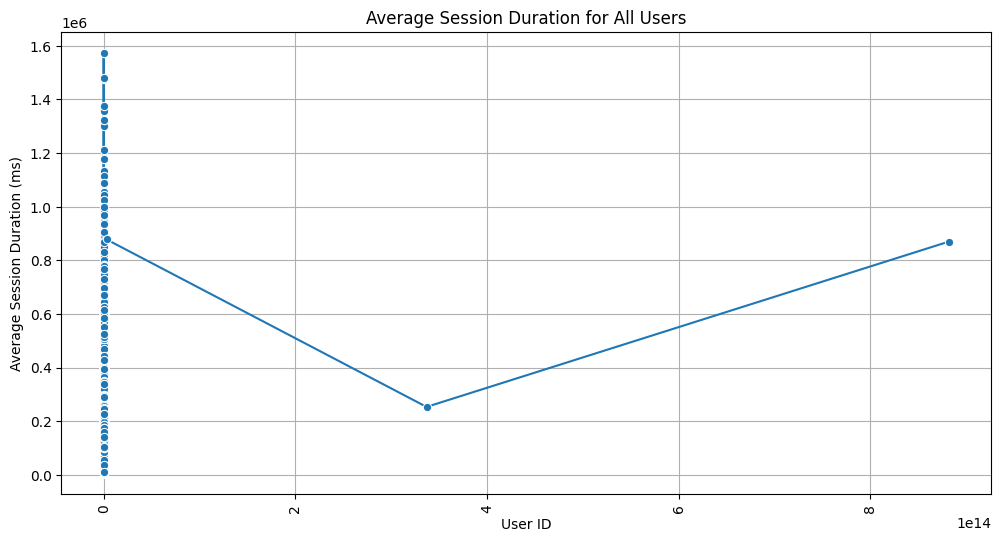

In [17]:
engagement_metrics_sorted = engagement_metrics.sort_values('average_session_duration')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=engagement_metrics_sorted.index, y='average_session_duration', data=engagement_metrics_sorted, marker='o')
plt.title('Average Session Duration for All Users')
plt.xlabel('User ID')
plt.ylabel('Average Session Duration (ms)')
plt.xticks(rotation=90)  # Rotate x labels for better readability if there are many users
plt.grid(True)
plt.show()

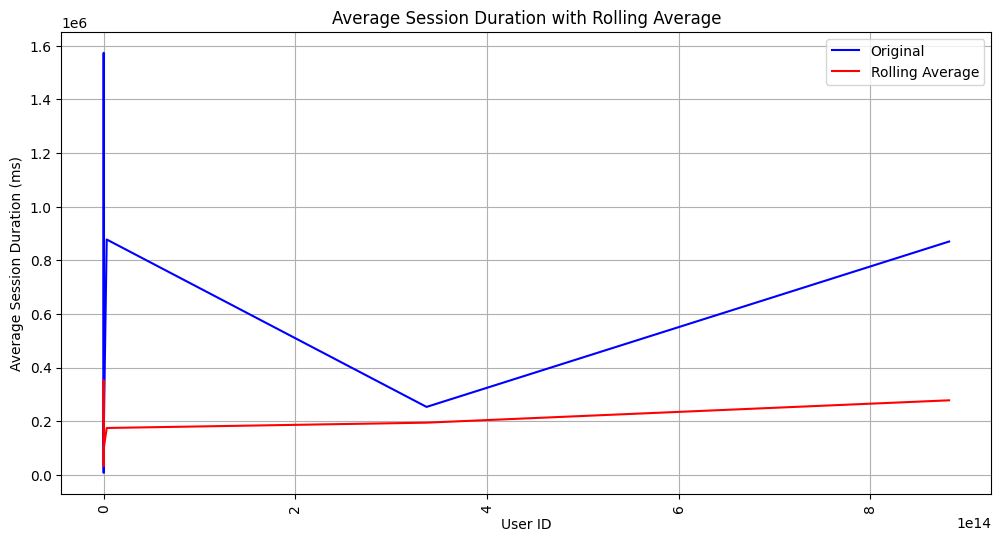

In [18]:
rolling_window = 10  # Adjust window size as needed
engagement_metrics['rolling_avg'] = engagement_metrics['average_session_duration'].rolling(window=rolling_window).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=engagement_metrics.index, y='average_session_duration', data=engagement_metrics, color='blue', label='Original')
sns.lineplot(x=engagement_metrics.index, y='rolling_avg', data=engagement_metrics, color='red', label='Rolling Average')
plt.title('Average Session Duration with Rolling Average')
plt.xlabel('User ID')
plt.ylabel('Average Session Duration (ms)')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [28]:
top_10_total_session_duration= total_session_duration.sort_values(ascending=False).head(10)
top_10_total_session_duration

MSISDN/Number
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
3.376041e+10     5321667.0
Name: Dur. (ms), dtype: float64

In [29]:
top_10_sessions_frequency= sessions_frequency.sort_values(ascending=False).head(10)
top_10_sessions_frequency

MSISDN/Number
3.362632e+10    18
3.362578e+10    17
3.361489e+10    17
3.365973e+10    16
3.376054e+10    15
3.367588e+10    15
3.366716e+10    13
3.362708e+10    12
3.360452e+10    12
3.376041e+10    12
dtype: int64

In [30]:
top_10_average_session_duration= average_session_duration.sort_values(ascending=False).head(10)
top_10_average_session_duration

MSISDN/Number
3.366926e+10    1573420.0
3.366172e+10    1480875.0
3.360750e+10    1474663.0
3.376260e+10    1375612.0
3.376063e+10    1361762.0
3.376167e+10    1357643.0
3.375034e+10    1321509.0
3.366682e+10    1299381.0
3.369870e+10    1209607.0
3.363050e+10    1177517.0
Name: Dur. (ms), dtype: float64

In [31]:
top_10_total_traffic= total_traffic.sort_values(ascending=False).head(10)
top_10_total_traffic


MSISDN/Number
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
3.369879e+10    6.540899e+09
Name: total_traffic, dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()

In [13]:

engagement_metrics[["sessions_frequency_t", "average_session_duration_t", "total_session_duration_t", "total_traffic_t"]] = scaler.fit_transform(
    engagement_metrics[["sessions_frequency", "average_session_duration", "total_session_duration", "total_traffic"]]
)
engagement_metrics


,sessions_frequency,average_session_duration,total_session_duration,total_traffic,sessions_frequency_t,average_session_duration_t,total_session_duration_t,total_traffic_t
MSISDN/Number,,,,,,,,
3.360100e+10,1,116720.0,116720.0,8.786906e+08,-0.488564,0.194128,-0.158014,0.382297
3.360100e+10,1,181230.0,181230.0,1.568596e+08,-0.488564,1.087037,0.188148,-1.087666
3.360100e+10,1,134969.0,134969.0,5.959665e+08,-0.488564,0.446720,-0.060090,-0.193453
3.360101e+10,1,49878.0,49878.0,4.223207e+08,-0.488564,-0.731059,-0.516690,-0.547071
3.360101e+10,2,18552.0,37104.0,1.457411e+09,0.752103,-1.164655,-0.585235,1.560825
...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810.0,8810.0,7.146416e+08,-0.488564,-1.299498,-0.737061,0.048222
3.379000e+10,1,140988.0,140988.0,4.803073e+08,-0.488564,0.530031,-0.027791,-0.428985
3.197021e+12,1,877385.0,877385.0,2.321240e+08,-0.488564,10.722796,3.923731,-0.934395


In [17]:
import matplotlib.pyplot as plt
def optimise_k_means(data,max_k):
    mean=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans_model = KMeans(n_clusters=k)  
        kmeans_model.fit(data)
        mean.append(k)
        inertias.append(kmeans_model.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(mean,inertias,"o-")
    plt.xlabel("number of cluster")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

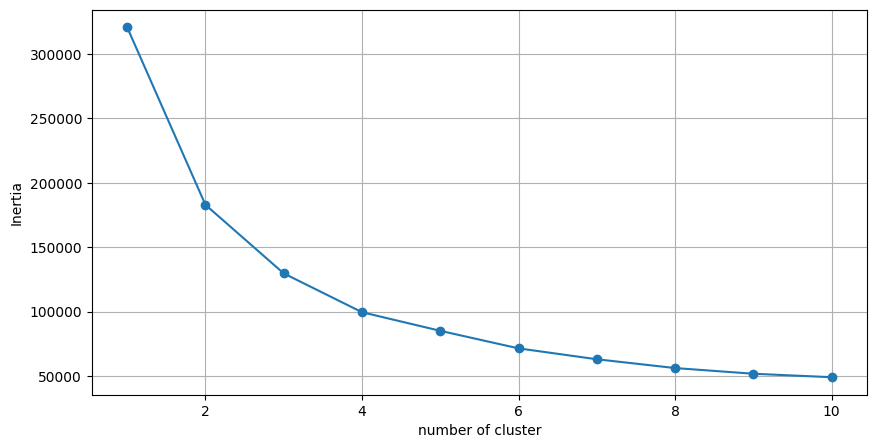

In [18]:
optimise_k_means(engagement_metrics[["sessions_frequency_t","total_session_duration_t", "total_traffic_t"]],11)

In [22]:
Kmeans=KMeans(n_clusters=3)
Kmeans.fit(engagement_metrics[["sessions_frequency_t", "average_session_duration_t", "total_session_duration_t", "total_traffic_t"]])
engagement_metrics["K_mean"]=Kmeans.labels_
_
engagement_metrics

,sessions_frequency,average_session_duration,total_session_duration,total_traffic,sessions_frequency_t,average_session_duration_t,total_session_duration_t,total_traffic_t,K_mean
MSISDN/Number,,,,,,,,,
3.360100e+10,1,116720.0,116720.0,8.786906e+08,-0.488564,0.194128,-0.158014,0.382297,0
3.360100e+10,1,181230.0,181230.0,1.568596e+08,-0.488564,1.087037,0.188148,-1.087666,2
3.360100e+10,1,134969.0,134969.0,5.959665e+08,-0.488564,0.446720,-0.060090,-0.193453,2
3.360101e+10,1,49878.0,49878.0,4.223207e+08,-0.488564,-0.731059,-0.516690,-0.547071,0
3.360101e+10,2,18552.0,37104.0,1.457411e+09,0.752103,-1.164655,-0.585235,1.560825,0
...,...,...,...,...,...,...,...,...,...
3.379000e+10,1,8810.0,8810.0,7.146416e+08,-0.488564,-1.299498,-0.737061,0.048222,0
3.379000e+10,1,140988.0,140988.0,4.803073e+08,-0.488564,0.530031,-0.027791,-0.428985,2
3.197021e+12,1,877385.0,877385.0,2.321240e+08,-0.488564,10.722796,3.923731,-0.934395,2


In [31]:
centroids = Kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['sessions_frequency', 'average_session_duration', 'total_session_duration',"total_traffic"])
less_engaged_cluster = 0 
less_engaged_centroid = centroids[less_engaged_cluster]
less_engaged_centroid


array([-0.20898926, -0.46899252, -0.33553927, -0.17503425])

In [32]:
centroid_df

,sessions_frequency,average_session_duration,total_session_duration,total_traffic
0,-0.208989,-0.468993,-0.335539,-0.175034
1,2.808144,0.285090,1.736458,2.399656
2,-0.228099,1.144032,0.396721,-0.204184


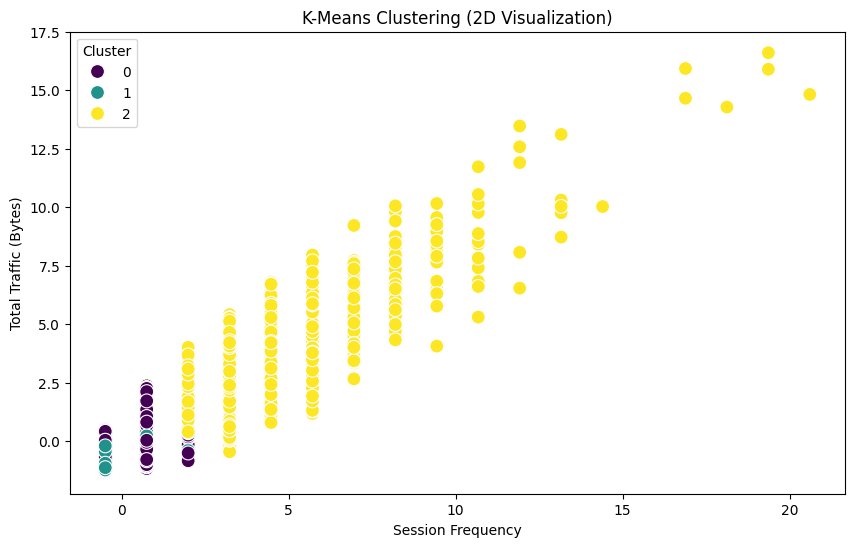

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sessions_frequency_t', 
    y='total_traffic_t', 
    hue='K_mean',  # Color by cluster
    data=engagement_metrics,
    palette='viridis',  # Use a colormap for the clusters
    s=100  # Set point size
)

# Add labels and title
plt.title('K-Means Clustering (2D Visualization)')
plt.xlabel('Session Frequency')
plt.ylabel('Total Traffic (Bytes)')
plt.legend(title='Cluster')
plt.show()

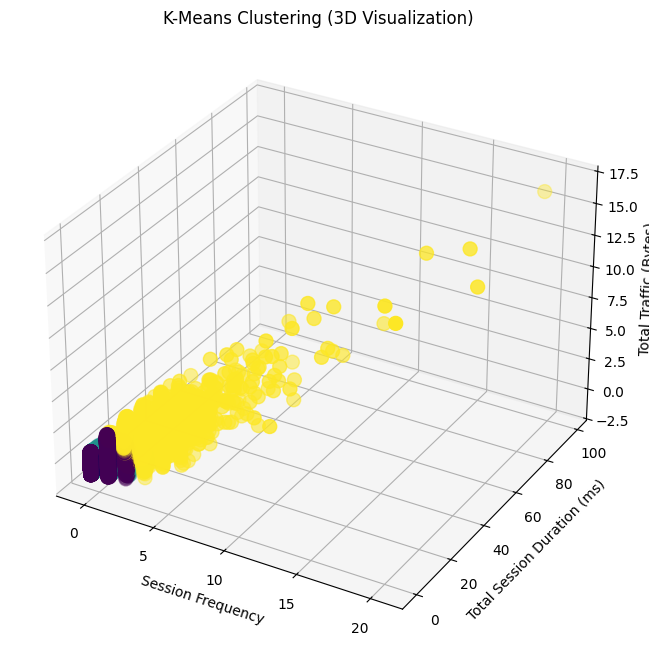

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3D plot
ax.scatter(
    engagement_metrics['sessions_frequency_t'],
    engagement_metrics['total_session_duration_t'],
    engagement_metrics['total_traffic_t'],
    c=engagement_metrics['K_mean'],  # Color by cluster
    cmap='viridis',  # Colormap
    s=100  # Point size
)

# Add axis labels and title
ax.set_xlabel('Session Frequency')
ax.set_ylabel('Total Session Duration (ms)')
ax.set_zlabel('Total Traffic (Bytes)')
ax.set_title('K-Means Clustering (3D Visualization)')

plt.show()


In [55]:
cluster_stats = engagement_metrics.groupby('K_mean').agg({
    'sessions_frequency': ['min', 'max', 'mean', 'sum'],
    'total_session_duration': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()
cluster_stats


K_mean sessions_frequency                      total_session_duration  \
                        min max      mean    sum                    min   
0      0                  1   3  1.225605  87594                 7142.0   
1      1                  1   3  1.208029  33553               128731.0   
2      2                  2  18  3.651031  27788                31958.0   

                                           total_traffic                \
          max           mean           sum           min           max   
0    305569.0   83408.553687  5.961209e+09    33249009.0  1.855010e+09   
1   2083209.0  219229.616706  6.089103e+09    33575840.0  1.588917e+09   
2  18553754.0  468864.238602  3.568526e+09   474595196.0  8.846226e+09   

                               
           mean           sum  
0  6.053386e+08  4.326355e+13  
1  5.889600e+08  1.635836e+13  
2  1.867236e+09  1.421154e+13

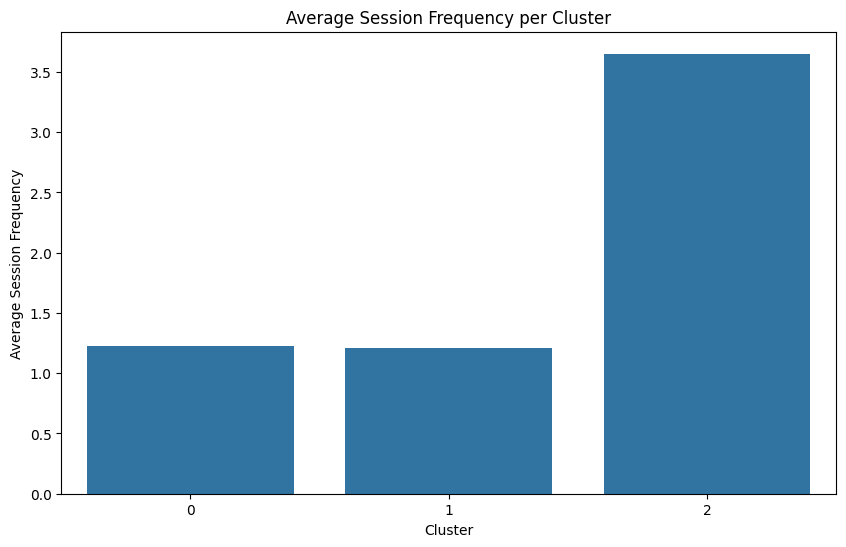

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='K_mean', y=('sessions_frequency', 'mean'), data=cluster_stats)
plt.title('Average Session Frequency per Cluster')
plt.ylabel('Average Session Frequency')
plt.xlabel('Cluster')
plt.show()

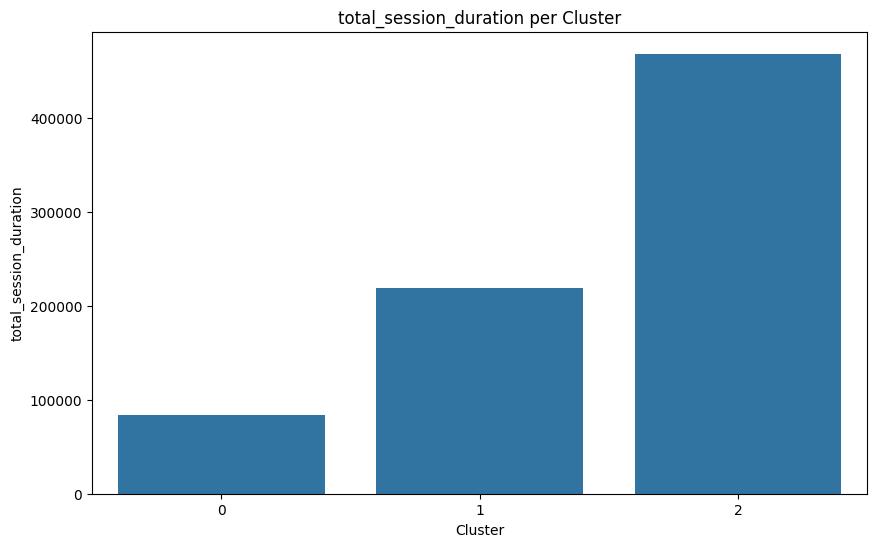

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='K_mean', y=('total_session_duration', 'mean'), data=cluster_stats)
plt.title('total_session_duration per Cluster')
plt.ylabel('total_session_duration')
plt.xlabel('Cluster')
plt.show()

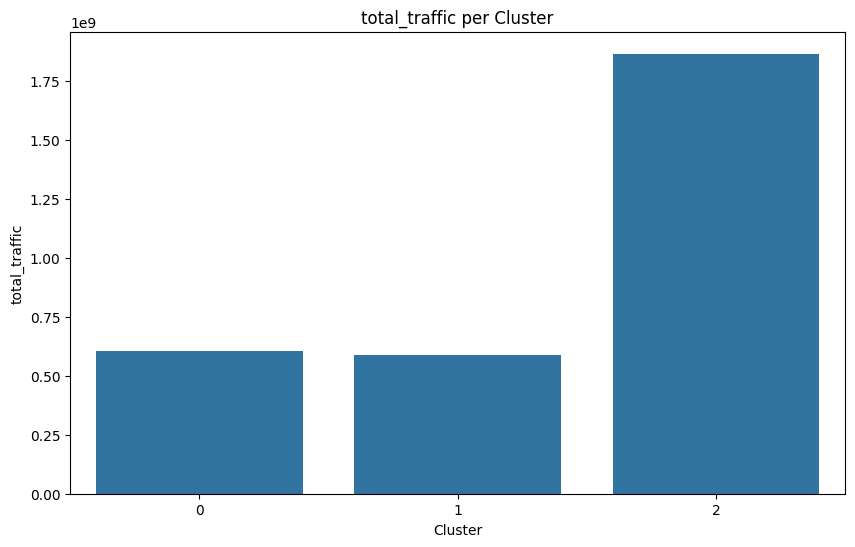

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='K_mean', y=('total_traffic', 'mean'), data=cluster_stats)
plt.title('total_traffic per Cluster')
plt.ylabel('total_traffic')
plt.xlabel('Cluster')
plt.show()

In [60]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_traffic
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0


In [75]:
social_media_usage_per_user = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)']].sum().sum(axis=1)
YouTube_usage_per_user = df.groupby('MSISDN/Number')[['Youtube DL (Bytes)', 'Youtube UL (Bytes)']].sum().sum(axis=1)
Netflix_usage_per_user = df.groupby('MSISDN/Number')[['Netflix DL (Bytes)', 'Netflix UL (Bytes)']].sum().sum(axis=1)
Google_usage_per_user = df.groupby('MSISDN/Number')[['Google DL (Bytes)', 'Google UL (Bytes)']].sum().sum(axis=1)
Email_usage_per_user = df.groupby('MSISDN/Number')[['Email DL (Bytes)', 'Email UL (Bytes)']].sum().sum(axis=1)
Gaming_usage_per_user = df.groupby('MSISDN/Number')[['Gaming DL (Bytes)', 'Gaming UL (Bytes)']].sum().sum(axis=1)
Other_media_usage_per_user = df.groupby('MSISDN/Number')[['Other DL (Bytes)', 'Other DL (Bytes)']].sum().sum(axis=1)

In [76]:
each_application_usage_per_user=pd.DataFrame({
    'social_media_usage_per_user': social_media_usage_per_user,
    'YouTube_usage_per_user': YouTube_usage_per_user,
    'Netflix_usage_per_user':Netflix_usage_per_user,
    'Google_usage_per_user': Google_usage_per_user,
    'Email_usage_per_user': Email_usage_per_user,
    'Gaming_usage_per_user': Gaming_usage_per_user,
    'Other_media_usage_per_user': Other_media_usage_per_user
   

})
each_application_usage_per_user

,social_media_usage_per_user,YouTube_usage_per_user,Netflix_usage_per_user,Google_usage_per_user,Email_usage_per_user,Gaming_usage_per_user,Other_media_usage_per_user
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,21624548.0,27180981.0,4389005.0,1331362.0,8.124587e+08,7.541940e+08
3.360100e+10,2660565.0,12432223.0,11221763.0,5334863.0,3307781.0,1.197501e+08,5.591154e+08
3.360100e+10,3195623.0,21333570.0,19353900.0,3443126.0,3205380.0,5.388277e+08,9.901730e+08
3.360101e+10,280294.0,6977321.0,1942092.0,9678493.0,2284670.0,3.911261e+08,5.049600e+07
3.360101e+10,2912542.0,41533002.0,49201724.0,18499616.0,3305469.0,1.314798e+09,1.555287e+09
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,26647843.0,14902538.0,7531269.0,1006915.0,6.603614e+08,5.827826e+08
3.379000e+10,498569.0,19851572.0,8531060.0,5429705.0,2514097.0,4.370033e+08,4.092721e+08
3.197021e+12,715224.0,11959905.0,26592300.0,10438660.0,1520771.0,1.780487e+08,9.353562e+08


In [81]:
top_10_total_social_media_user= each_application_usage_per_user["social_media_usage_per_user"].sort_values(ascending=False).head(10)
top_10_total_social_media_user


MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849e+10    23000066.0
Name: social_media_usage_per_user, dtype: float64

In [82]:
top_10_total_youtube_user= each_application_usage_per_user["YouTube_usage_per_user"].sort_values(ascending=False).head(10)
top_10_total_youtube_user

MSISDN/Number
3.362578e+10    452958769.0
3.376054e+10    396289198.0
3.361489e+10    394370218.0
3.362632e+10    374483047.0
3.367588e+10    317410572.0
3.366716e+10    315231310.0
3.362708e+10    308790774.0
3.376041e+10    303169107.0
3.369879e+10    302661958.0
3.360313e+10    284090139.0
Name: YouTube_usage_per_user, dtype: float64

In [83]:
top_10_Netflix_usage_per_user= each_application_usage_per_user["YouTube_usage_per_user"].sort_values(ascending=False).head(10)
top_10_Netflix_usage_per_user

MSISDN/Number
3.362578e+10    452958769.0
3.376054e+10    396289198.0
3.361489e+10    394370218.0
3.362632e+10    374483047.0
3.367588e+10    317410572.0
3.366716e+10    315231310.0
3.362708e+10    308790774.0
3.376041e+10    303169107.0
3.369879e+10    302661958.0
3.360313e+10    284090139.0
Name: YouTube_usage_per_user, dtype: float64

In [84]:
top_10_Google_usage_per_user= each_application_usage_per_user["Google_usage_per_user"].sort_values(ascending=False).head(10)
top_10_Google_usage_per_user

MSISDN/Number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
Name: Google_usage_per_user, dtype: float64

In [86]:
top_10_Email_usage_per_user= each_application_usage_per_user["Email_usage_per_user"].sort_values(ascending=False).head(10)
top_10_Email_usage_per_user

MSISDN/Number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    30335796.0
3.369879e+10    29059042.0
Name: Email_usage_per_user, dtype: float64

In [85]:
top_10_Gaming_usage_per_user= each_application_usage_per_user["Gaming_usage_per_user"].sort_values(ascending=False).head(10)
top_10_Gaming_usage_per_user

MSISDN/Number
3.361489e+10    7.749432e+09
3.376054e+10    7.461045e+09
3.362578e+10    7.326673e+09
3.367588e+10    6.970568e+09
3.362632e+10    6.887572e+09
3.365973e+10    6.725559e+09
3.366646e+10    6.646303e+09
3.376041e+10    6.268620e+09
3.366471e+10    6.103856e+09
3.369879e+10    5.753743e+09
Name: Gaming_usage_per_user, dtype: float64

In [87]:
top_10_Other_media_usage_per_user= each_application_usage_per_user["Other_media_usage_per_user"].sort_values(ascending=False).head(10)
top_10_Other_media_usage_per_user

MSISDN/Number
3.362632e+10    1.605095e+10
3.361489e+10    1.499060e+10
3.367588e+10    1.333015e+10
3.360313e+10    1.244541e+10
3.362578e+10    1.240331e+10
3.365973e+10    1.236510e+10
3.362695e+10    1.045754e+10
3.362708e+10    1.007949e+10
3.376127e+10    9.995969e+09
3.363004e+10    9.813219e+09
Name: Other_media_usage_per_user, dtype: float64

In [88]:
total_usage_per_application = {app: usage.sum() for app, usage in each_application_usage_per_user.items()}

# Find top 3 most used applications
top_3_applications = sorted(total_usage_per_application.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_applications

[('Other_media_usage_per_user', 125447148888122.0),
 ('Gaming_usage_per_user', 64088917409212.0),
 ('YouTube_usage_per_user', 3372204313367.0)]

C:\Users\user\AppData\Local\Temp\ipykernel_11756\4215324780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Application', y='Total Usage', data=top_3_df, palette='viridis')


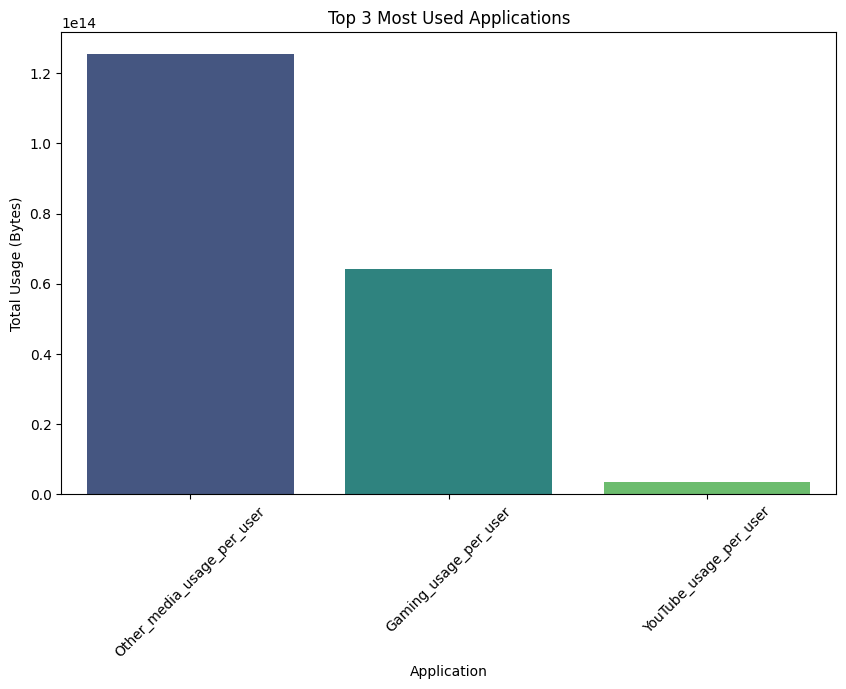

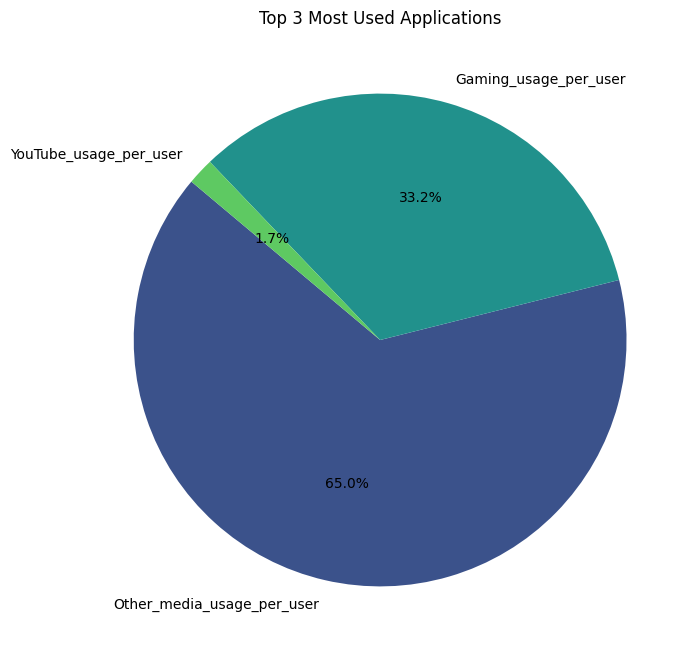

In [89]:
top_3_df = pd.DataFrame(top_3_applications, columns=['Application', 'Total Usage'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Application', y='Total Usage', data=top_3_df, palette='viridis')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Usage (Bytes)')
plt.xticks(rotation=45)
plt.show()

# Pie chart (alternative visualization)
plt.figure(figsize=(8, 8))
plt.pie(top_3_df['Total Usage'], labels=top_3_df['Application'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 3))
plt.title('Top 3 Most Used Applications')
plt.show()